<a href="https://colab.research.google.com/github/lailazuhria/codingTA/blob/branch/Coding_Target_Age_(75%2C_20%2C_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
import time

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:
file_id = '1QYpC257uVUY_BGpwsM5PIw4GMUZOaJ5n'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'asthma_disease_data_ref.csv'
gdown.download(url, output, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1QYpC257uVUY_BGpwsM5PIw4GMUZOaJ5n
To: /content/asthma_disease_data_ref.csv
100%|██████████| 248k/248k [00:00<00:00, 7.09MB/s]


'asthma_disease_data_ref.csv'

In [ ]:
df = pd.read_csv('asthma_disease_data_ref.csv')

In [ ]:
# Pisahkan fitur dan target (label)
X = df.drop("Age", axis=1)
y = df["Age"]

In [ ]:
# Split Dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_forecast, y_test, y_forecast = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_forecast_scaled = scaler.transform(X_forecast)

In [ ]:
# 3. Train Random Forest Model and Evaluate Performance

print("Random Forest Results:")


rf_model = RandomForestClassifier()
start_time_rf = time.time()
rf_model.fit(X_train, y_train)
train_time_rf = time.time() - start_time_rf
print(f"Training Time (75% data): {train_time_rf:.4f} seconds")

Random Forest Results:
Training Time (75% data): 2.5571 seconds


In [ ]:
# Prediction and Evaluation on Testing (20%)
start_time_rf_test = time.time()
y_pred_rf = rf_model.predict(X_test)
test_time_rf = time.time() - start_time_rf_test
accuracy_rf = accuracy_score(y_test, y_pred_rf)
error_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Testing Time (20% data): {test_time_rf:.4f} seconds")
print(f"Testing Accuracy: {accuracy_rf:.4f}%")
print(f"Testing Error (MAE): {error_rf:.4f}")

Testing Time (20% data): 0.0314 seconds
Testing Accuracy: 0.0063 %
Testing Error (MAE): 24.4435


In [ ]:
# Prediksi dengan RandomForest
y_forecast_pred_rf = rf_model.predict(X_forecast)

In [ ]:
print(X_train.columns)
print(X_forecast.columns)

Index(['PatientID', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure',
       'LungFunctionFEV1', 'LungFunctionFVC'],
      dtype='object')
Index(['PatientID', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure',
       'LungFunctionFEV1', 'LungFunctionFVC'],
      dtype='object')


In [ ]:
# Prediction and Evaluation on Forecasting (5%)
start_time_rf_forecast = time.time()
y_forecast_pred_rf = rf_model.predict(X_forecast)
forecast_time_rf = time.time() - start_time_rf_forecast
forecast_error_rf = mean_absolute_error(y_forecast, y_forecast_pred_rf)
print(f"Forecasting Time (5% data): {forecast_time_rf:.4f} seconds")
print(f"Forecasting Error (MAE): {forecast_error_rf:.4f}\n")

Forecasting Time (5% data): 0.0195 seconds
Forecasting Error (MAE): 23.2583



SUPPORT VECTOR MACHINE (SVM) ALGORTIMA

In [ ]:
# 4. Train Support Vector Machine Model and Evaluate Performance

print("Support Vector Machine Results:")

# Training SVM model
svm_model = SVC()
start_time_svm = time.time()
svm_model.fit(X_train_scaled, y_train)
train_time_svm = time.time() - start_time_svm
print(f"Training Time (75% data): {train_time_svm:.4f} seconds")

Support Vector Machine Results:
Training Time (75% data): 0.4030 seconds


In [ ]:
# Prediction and Evaluation on Testing (20%)
start_time_svm_test = time.time()
y_pred_svm = svm_model.predict(X_test)
test_time_svm = time.time() - start_time_svm_test
accuracy_svm = accuracy_score(y_test, y_pred_svm)
error_svm = mean_absolute_error(y_test, y_pred_svm)
print(f"Testing Time (20% data): {test_time_svm:.4f} seconds")
print(f"Testing Accuracy: {accuracy_svm:.4f} %")
print(f"Testing Error (MAE): {error_svm:.4f}")

Testing Time (20% data): 0.1351 seconds
Testing Accuracy: 0.0063 %
Testing Error (MAE): 19.1715


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# Prediction and Evaluation on Forecasting (5%)
start_time_svm_forecast = time.time()
y_forecast_pred_svm = svm_model.predict(X_forecast)
forecast_time_svm = time.time() - start_time_svm_forecast
forecast_error_svm = mean_absolute_error(y_forecast, y_forecast_pred_svm)
print(f"Forecasting Time (5% data): {forecast_time_svm:.4f} seconds")
print(f"Forecasting Error (MAE): {forecast_error_svm:.4f}")

Forecasting Time (5% data): 0.0377 seconds
Forecasting Error (MAE): 19.4917


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# Hasil prediksi ke dataset forecasting
X_forecast_rf = X_forecast.copy()
X_forecast_rf["RF_Prediction"] = y_forecast_pred_rf

X_forecast_svm = X_forecast.copy()
X_forecast_svm["SVM_Prediction"] = y_forecast_pred_svm

In [ ]:
# Simpan hasil prediksi ke file Excel
with pd.ExcelWriter('model_predictions.xlsx') as writer:
    X_forecast_rf.to_excel(writer, sheet_name='RF_Predictions', index=False)
    X_forecast_svm.to_excel(writer, sheet_name='SVM_Predictions', index=False)

print("Predictions saved to model_predictions.xlsx")

Predictions saved to model_predictions.xlsx


In [ ]:
# Membaca file Excel
df_rf = pd.read_excel('model_predictions.xlsx', sheet_name='RF_Predictions')
df_svm = pd.read_excel('model_predictions.xlsx', sheet_name='SVM_Predictions')

# Tampilkan data
print("RF Predictions:")
print(df_rf.head())

print("\nSVM Predictions:")
print(df_svm.head())

RF Predictions:
   PatientID  PhysicalActivity  DietQuality  SleepQuality  PollutionExposure  \
0       1791          4.225627     4.843923      9.062704           0.587893   
1       1834          5.009790     7.714103      7.601771           7.993344   
2        549          0.179369     2.895126      6.733256           7.944387   
3       1945          4.954069     9.906439      7.365027           2.653167   
4       1777          6.832933     8.643952      4.645967           0.987979   

   PollenExposure  DustExposure  LungFunctionFEV1  LungFunctionFVC  \
0        5.852047      3.320732          3.897428         2.606517   
1        0.357722      4.646983          1.890908         3.046281   
2        8.459813      3.556875          3.028592         4.683671   
3        0.807740      2.074471          3.435175         5.767824   
4        3.615107      6.599530          3.262054         2.812895   

   RF_Prediction  
0             15  
1             71  
2             43  
3     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Salin file ke Google Drive
!cp model_predictions.xlsx /content/drive/MyDrive/TA_Lailatuz_Zuhria/
print("File saved to Google Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to Google Drive


In [ ]:
# Tuning untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)
rf_model = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Tuning untuk SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)
svm_model = grid_search_svm.best_estimator_
print("Best Parameters for SVM:", grid_search_svm.best_params_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


GRAFIK PERBANDINGAN ALGORITMA RANDOM FOREST DAN SUPPORT VECTOR MACHINE

In [ ]:
# Predictions for Training, Testing, and Forecasting
y_train_actual = y_train.values
y_train_rf = rf_model.predict(X_train)
y_train_svm = svm_model.predict(X_train_scaled)

y_test_actual = y_test.values
y_test_rf = y_pred_rf
y_test_svm = svm_model.predict(X_test_scaled)

y_forecast_actual = y_forecast.values
y_forecast_rf = y_forecast_pred_rf
y_forecast_svm = svm_model.predict(X_forecast_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Menghitung error untuk training
mae_rf_train = mean_absolute_error(y_train_actual, y_train_rf)
mse_rf_train = mean_squared_error(y_train_actual, y_train_rf)

mae_svm_train = mean_absolute_error(y_train_actual, y_train_svm)
mse_svm_train = mean_squared_error(y_train_actual, y_train_svm)

# Menghitung error untuk testing
mae_rf_test = mean_absolute_error(y_test_actual, y_test_rf)
mse_rf_test= mean_squared_error(y_test_actual, y_test_rf)

mae_svm_test = mean_absolute_error(y_test_actual, y_test_svm)
mse_svm_test= mean_squared_error(y_test_actual, y_test_svm)

# Menghitung error untuk forecasting
mae_rf_forecast = mean_absolute_error(y_forecast_actual, y_forecast_rf)
mse_rf_forecast = mean_squared_error(y_forecast_actual, y_forecast_rf)

mae_svm_forecast = mean_absolute_error(y_forecast_actual, y_forecast_svm)
mse_svm_forecast = mean_squared_error(y_forecast_actual, y_forecast_svm)

# Menampilkan hasil error
print("Random Forest Training MAE:", mae_rf_train, "MSE:", mse_rf_train)
print("SVM Training MAE:", mae_svm_train, "MSE:", mse_svm_train)
print("Random Forest Testing MAE:", mae_rf_test, "MSE:", mse_rf_test)
print("SVM Testing MAE:", mae_svm_test, "MSE:", mse_svm_test)
print("Random Forest Forecast MAE:", mae_rf_forecast, "MSE:", mse_rf_forecast)
print("SVM Forecast MAE:", mae_svm_forecast, "MSE:", mse_svm_forecast)

Random Forest Training MAE: 28.041248606466 MSE: 1163.8461538461538
SVM Training MAE: 23.29096989966555 MSE: 837.0122630992196
Random Forest Testing MAE: 24.443514644351463 MSE: 900.9205020920502
SVM Testing MAE: 23.690376569037657 MSE: 846.9665271966527
Random Forest Forecast MAE: 23.258333333333333 MSE: 819.725
SVM Forecast MAE: 23.775 MSE: 869.3583333333333


In [ ]:
# Membatasi data untuk visualisasi agar lebih mudah dibaca
num_samples = 1000  # Batas jumlah data yang ditampilkan (20 sample)
train_indices = range(num_samples)
test_indices = range(num_samples)
forecast_indices = range(len(y_forecast_actual))  # Forecasting lebih kecil

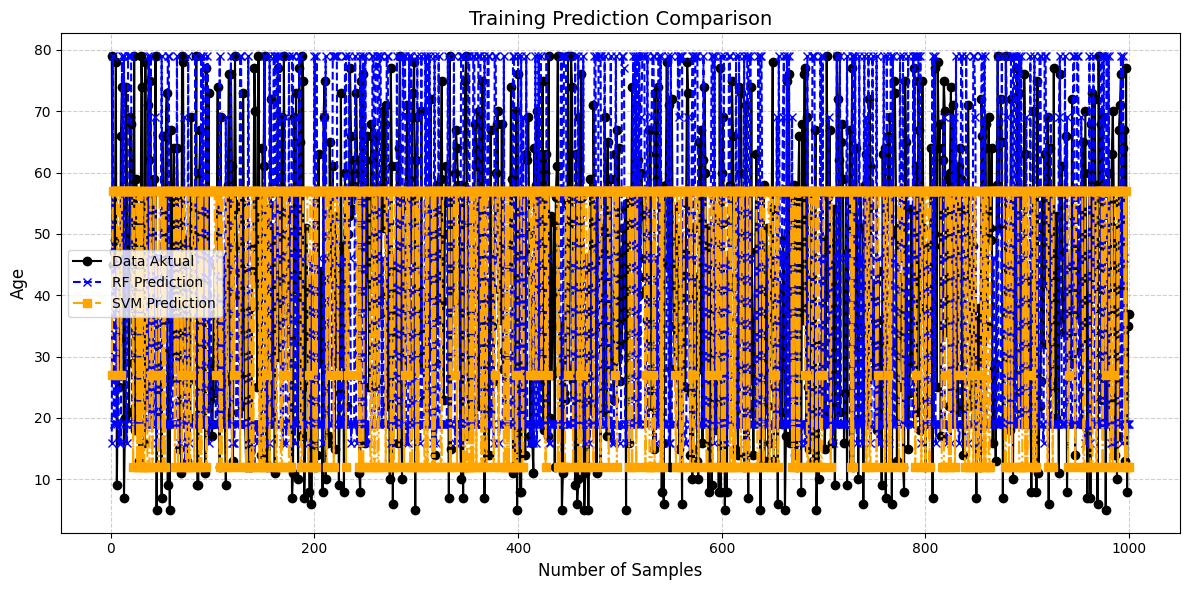

In [ ]:
# Grafik Training
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_samples + 1), y_train_actual[:num_samples], label="Data Aktual", color='black', linestyle='-', marker='o')
plt.plot(range(1, num_samples + 1), y_train_rf[:num_samples], label="RF Prediction", color='blue', linestyle='--', marker='x')
plt.plot(range(1, num_samples + 1), y_train_svm[:num_samples], label="SVM Prediction", color='orange', linestyle='-.', marker='s')
plt.title("Training Prediction Comparison", fontsize=14)
plt.xlabel("Number of Samples", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Cross-validation untuk Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy (Random Forest): {cv_scores_rf.mean():.4f}")

# Cross-validation untuk SVM
cv_scores_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy (SVM): {cv_scores_svm.mean():.4f}")

Cross-Validation Accuracy (Random Forest): 0.0123
Cross-Validation Accuracy (SVM): 0.0201


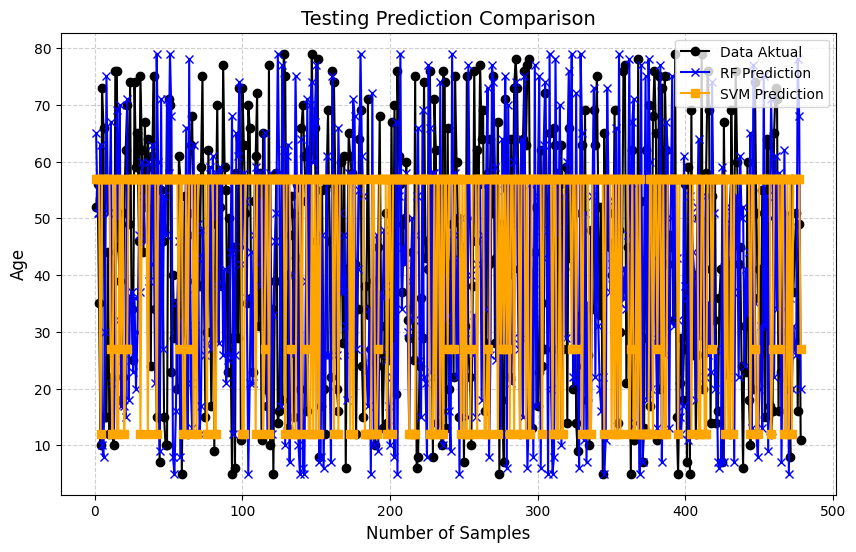

In [ ]:
# Testing Comparison Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(y_test_actual) + 1), y_test_actual, label="Data Aktual", marker='o', color='black')
plt.plot(range(1, len(y_test_rf) + 1), y_test_rf, label="RF Prediction", marker='x', color='blue')
plt.plot(range(1, len(y_test_svm) + 1), y_test_svm, label="SVM Prediction", marker='s', color='orange')
plt.title("Testing Prediction Comparison", fontsize=14)
plt.xlabel("Number of Samples", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

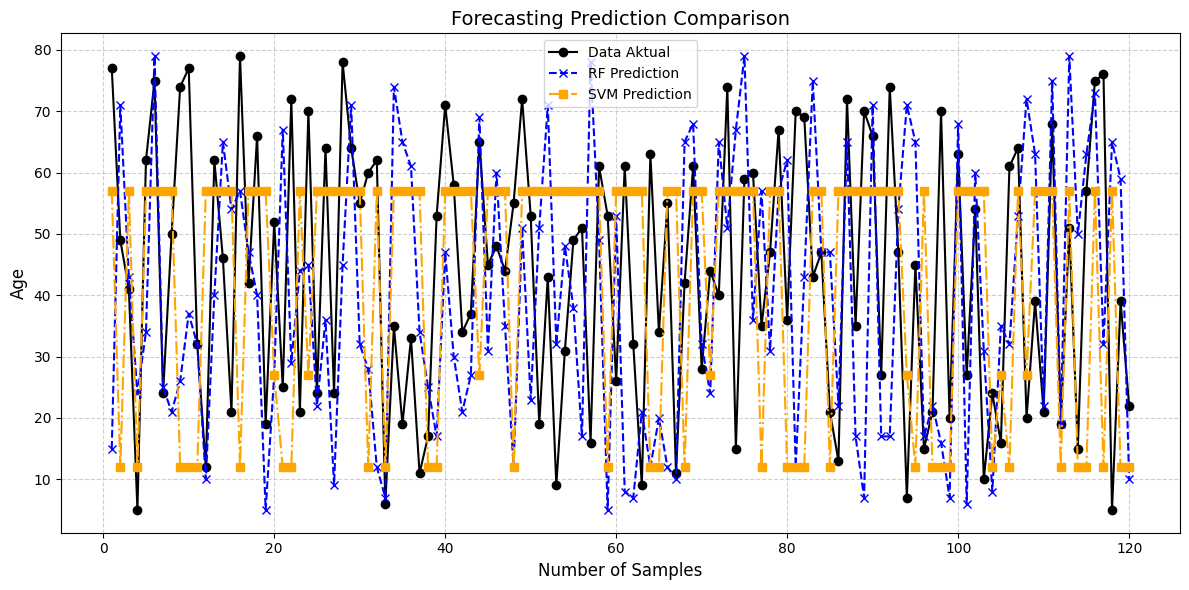

In [ ]:
# Grafik Forecasting
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_forecast_actual) + 1), y_forecast_actual, label="Data Aktual", color='black', linestyle='-', marker='o')
plt.plot(range(1, len(y_forecast_rf) + 1), y_forecast_rf, label="RF Prediction", color='blue', linestyle='--', marker='x')
plt.plot(range(1, len(y_forecast_svm) + 1), y_forecast_svm, label="SVM Prediction", color='orange', linestyle='-.', marker='s')
plt.title("Forecasting Prediction Comparison", fontsize=14)
plt.xlabel("Number of Samples", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

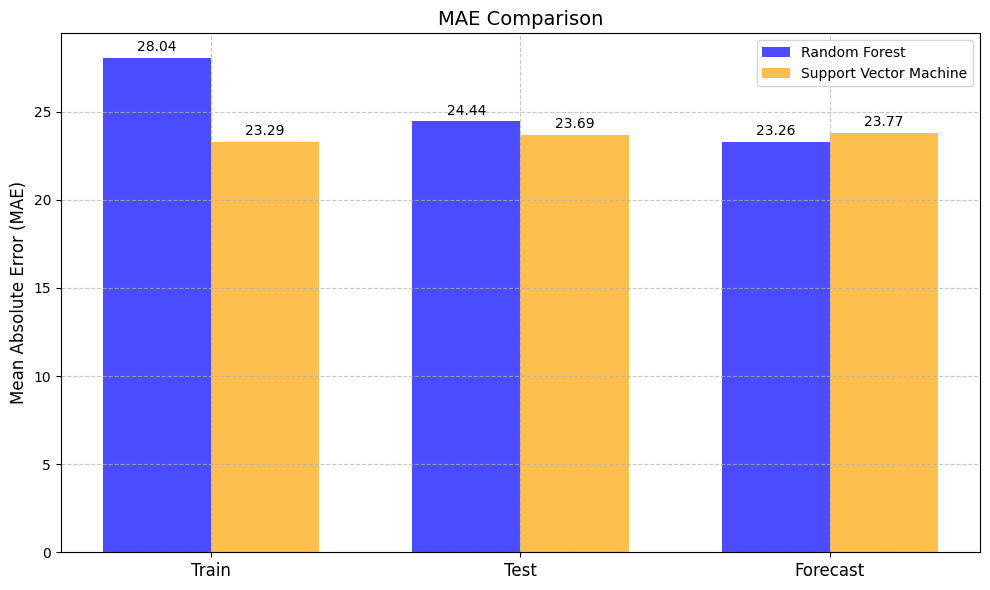

In [ ]:

# MAE Comparison Plot
labels = ['Train', 'Test', 'Forecast']
mae_rf = [mae_rf_train, mae_rf_test, mae_rf_forecast]
mae_svm = [mae_svm_train, mae_svm_test, mae_svm_forecast]

x = np.arange(len(labels))  # Label positions
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mae_rf, width, label='Random Forest', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, mae_svm, width, label='Support Vector Machine', color='orange', alpha=0.7)

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        ax.annotate(f'{bar.get_height():.2f}',
                     xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center', fontsize=10)

ax.set_ylabel('Mean Absolute Error (MAE)', fontsize=12)
ax.set_title('MAE Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()